In [1]:
# import necessary modules
# uncomment to get plots displayed in notebook
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from classy import Class
from scipy.optimize import fsolve
from scipy.interpolate import interp1d
import math


In [2]:
# esthetic definitions for the plots
font = {'size'   : 16, 'family':'STIXGeneral'}
axislabelfontsize='large'
matplotlib.rc('font', **font)
matplotlib.mathtext.rcParams['legend.fontsize']='medium'
plt.rcParams["figure.figsize"] = [8.0,6.0]

In [ ]:
Xi(.03)

In [15]:
def Xi(Neff):
    return ((7/8) * (11/4)**(-4/3) * Neff)**(1/4)

def Neff(xi):
    return (8/7) * (11/4)**(4/3) * xi**4


def Sigma_DAO(mp,me,alpha):
    #inputs are mp in GeV, me in MeV. 
    #need mp in GeV, me in eV
    me *= 10**6
    return alpha * (2/(alpha**2 * me)) * mp**(-1/6)

def compute_class(r,deltaN,mp,me,alpha,z_threshold_twin):
    settings = {'output':'tCl,pCl,lCl,mPk',
                     'lensing':'yes',
                       'omega_b':0.022032,
                       'omega_cdm':0.12038,
                       'h':0.67556,
                       'A_s':2.215e-9,
                       'n_s':0.965,
                       'z_reio':11.357,
                        'YHe_twin':0.0,
                       'r_all_twin':r,
                       'Delta_N_twin':deltaN,
                       'm_p_dark':mp,
                        'm_e_dark':me,
                        'alphafs_dark':alpha,
                        'recombination':'HyRec',
                        'z_threshold_twin':z_threshold_twin}
    M = Class()
    M.set(settings)
    M.compute()
    thermo = M.get_thermodynamics()
    return thermo

def plot_xe(thermo):
    #plt.figure(figsize=(5,5),dpi=300)
    plt.semilogx(thermo['z'],thermo['x_e_twin'])#,lw=2)#'0.1, 0.1, 1, 1, 0.01')

    #plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    plt.xlim(2*10**0,6*10**8)
    #plt.xlim(10**1,5*10**5)
    #plt.xlim(400,900)
    plt.ylim(10**-12,1.01)
    #plt.ylim(0.9999,1.00001)
    #plt.semilogy()
    plt.gca().invert_xaxis()
    #plt.legend()
    #plt.text(10**5.9,10**-3.3,'$\hat{r}$ = %g,$\\Delta N_{eff}$ = %g,\n$m_{p}$\' = %g GeV, $m_{e}$\' = %g MeV, $\\alpha$\' = %g'%(r,deltaN,mp,me*1000,alpha),fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
    plt.xlabel('z',fontsize=24)
    plt.ylabel('$x_e$',fontsize=24)
    plt.title('ADM Ionization Fraction')
def plot_xe_zoomed(thermo):

    plt.semilogx(thermo['z'],thermo['x_e_twin'])#,lw=2)#'0.1, 0.1, 1, 1, 0.01')

    #plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
    plt.grid()

    #plt.xlim(1*10**1,10**3)
    #plt.xlim(10**1,5*10**5)
    plt.xlim(3*10**6,8*10**7)
    #plt.ylim(10**-2,1.01)
    plt.ylim(0.99,1.0003)
    #plt.semilogy()
    plt.gca().invert_xaxis()
    #plt.legend()
    #plt.text(10**5.9,10**-3.3,'$\hat{r}$ = %g,$\\Delta N_{eff}$ = %g,\n$m_{p}$\' = %g GeV, $m_{e}$\' = %g MeV, $\\alpha$\' = %g'%(r,deltaN,mp,me*1000,alpha),fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
    plt.xlabel('z',fontsize=24)
    plt.ylabel('$x_e$',fontsize=24)
    plt.title('ADM Ionization Fraction')

In [23]:
thermo1 = compute_class(.1,.05,1,.0001,.004,0)#0.0021682)

In [6]:
tratio = Xi(.05)

In [ ]:
print(np.max(thermo1['x_e_twin']))

In [ ]:
plt.figure(figsize=(5,5),dpi=300)
plot_xe_zoomed(thermo1)
#plot_xe_zoomed(thermo2)
#plot_xe_zoomed(thermo3)
#plot_xe_zoomed(thermo4)

#threshold = 700

[]

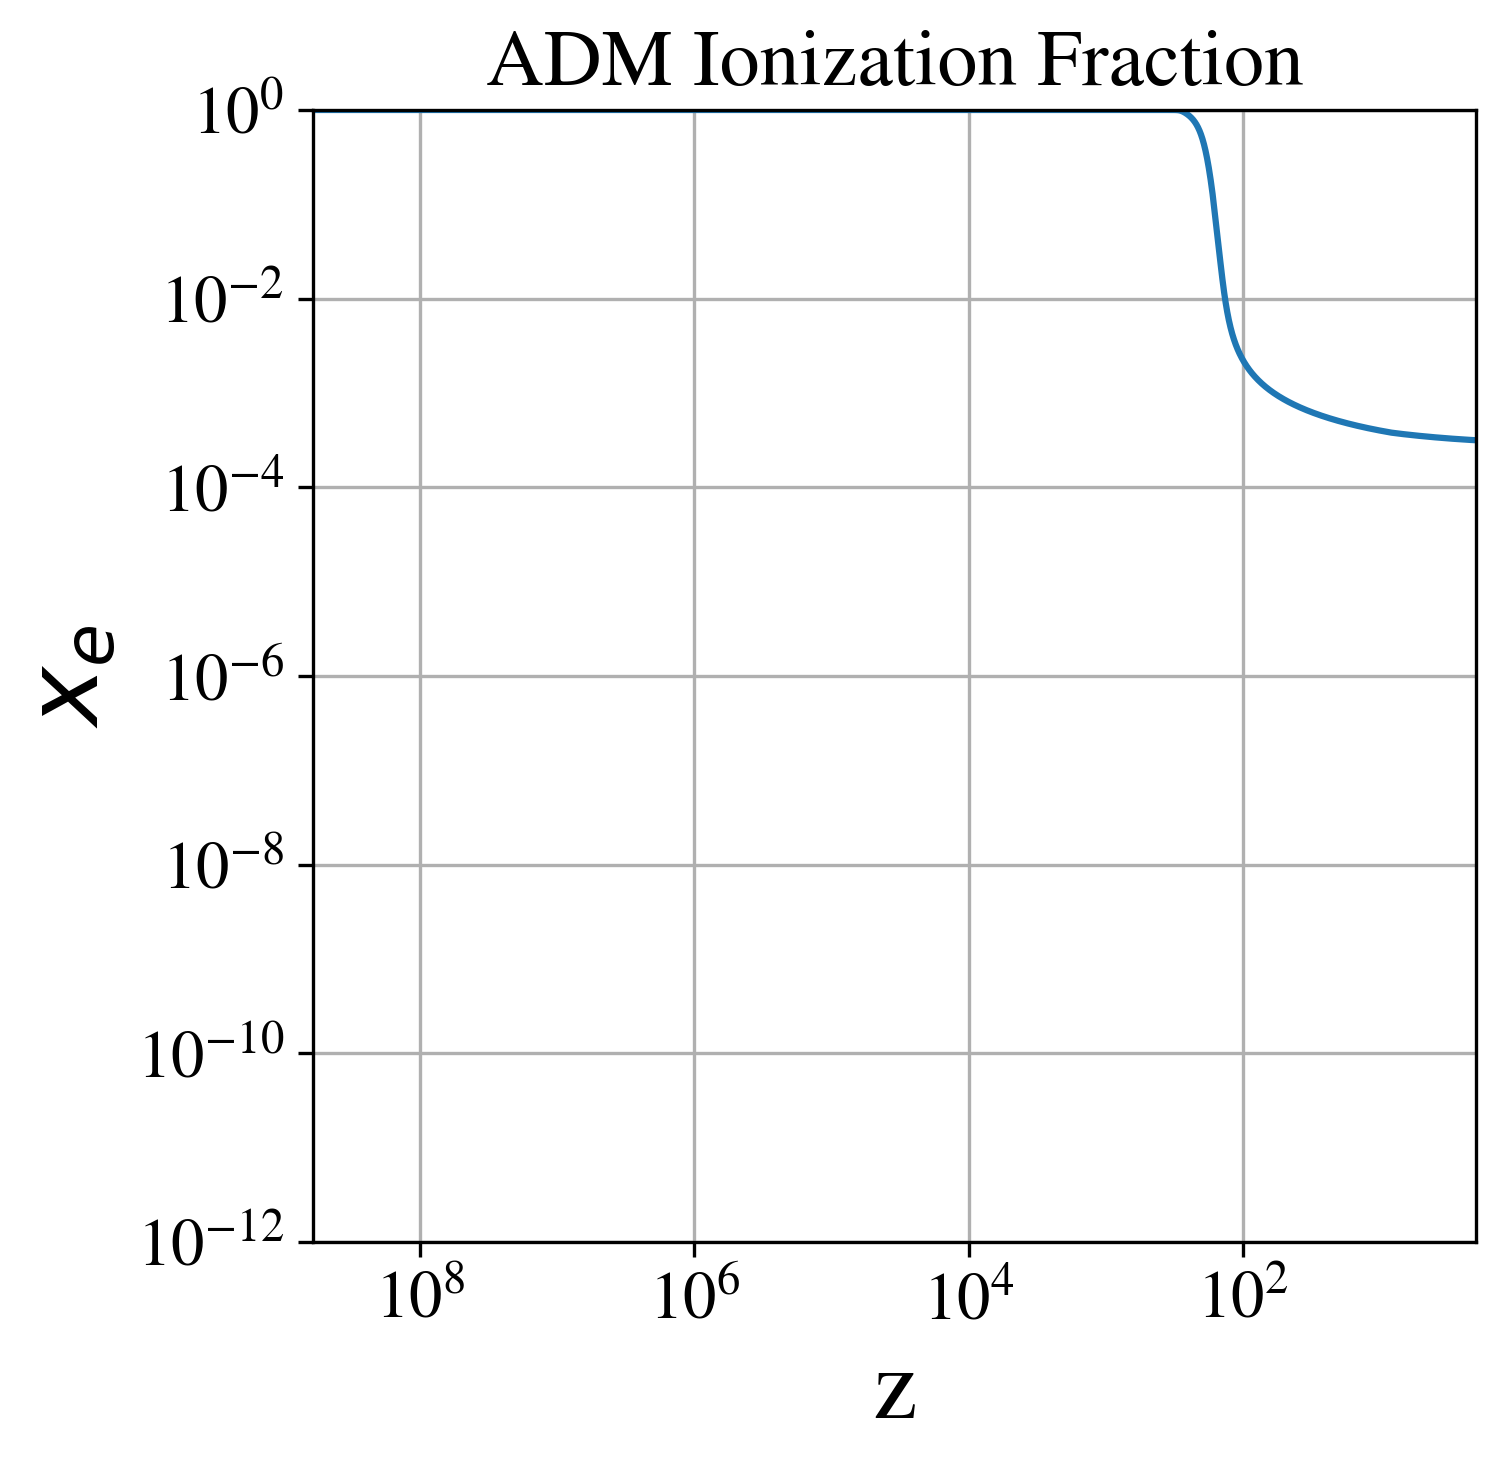

In [24]:

plt.figure(figsize=(5,5),dpi=300)
plot_xe(thermo1)
plt.semilogy()
#plt.plot([100,200],[0.1,0.1])
#plot_xe(thermo2)
#plot_xe(thermo3)
#plot_xe(thermo4)
#threshold = 700

In [ ]:
#For fixed r, delta, mp, me, what alpha can I go down to before the default value of z_threshold stops working? 
#Stops working is defined as there being a discontuity or behaviour not consistent with a Saha->Boltzmann transition, or a 
#transition where the ionization fraction before is less than 0.99 - ie a too large discontinuity. 
#First fix r=0.1, delta=0.1, mp=1 GeV, me= 1MeV. 
#Then once I find that alpha, start altering each other parameter and figure out whether it affects this transition from
#working to not working. 
#The transition from steady-state to full T_mat evolution is at the same threshold as the switch from Saha to Boltzmann for x_twin.
#Use command-line interface to find z_threshold from x=0.999 with Saha. Run with that z_threshold. Check if anything weird happens. 
#For alpha = 0.002, z_saha = 611.182, z_dec = 850.375. With z_threshold = z_saha, there is a discontinuity from Saha to Boltzmann, above 0.994, which could be smoothed.
#With z_threshold = z_dec, there is wrong behaviour right after the transition from saha to boltzmann, including x goes above 1. There is a kink at x=0.1.  
#z_dec leads to wrong behaviour, z_saha is kind of ok. 
#For alpha = 0.0021, z_saha = 676.71, z_dec= 771.222. With z_threshold = z_saha, there is a small discontinuity at the transition that could be smoothed.
#With z_threshold = z_dec, there's a small jump at the transition, and some slightly weird behaviour that looks like a downward discontinuity, but nothing egregious. No weird kinks I can see.
#So here, z_saha is kind of fine, and z_dec isn't really that bad either. 
#For alpha = 0.0022, z_saha = 745.736, z_dec = 702.616, With z_threshold = z_saha, there is a small discontinuity at x=0.998 at the transition, can be solved by smoothing.
#With z_threshold = z_dec, which is notably now LESS than the z_saha threshold, there is a discontinuity at x=0.96, which is unacceptably low, and x then goes up for a little bit before going down with the Boltzmann evolution.
#So clearly the z_saha is good and BETTER than the z_dec. 

#With alpha = 0.001, z_saha = 144, z_dec = 3404, and 0.1*B_D = 541. Both z_saha and z_dec give errors. z_threshold = 500 works, but gives a highly ionized dark sector. 
#The output is nonsense. 

#With alpha = 0.005, z_saha = 4152.67. z_dec = 135.22. Using z_threshold=z_saha, there isn't even a discontinuity I can see. This is clearly the right choice - the recombination happens at z=4000. 

#Ok alpha=0.005 Clearly is completely fine for the other parameter values I've chosen. I'm also happy with it as a lower bound. 
#So let's start varying the other parameters. First, r. Holding delta=0.1, mp=1 GeV, me= 1MeV, alpha = 0.005. 
#at r=1: z_saha = 4480.93. Everything's fine. Does anything bad happen at the low r end?
#At r = 0.01. z_saha = 3870.11. Everything's fine. 

#At r = 0.001, z_saha = 3623.87. Everything's fine. So r isn't a problem. 


#Let's keep r=0.1 and vary mp. keep delta=0.1, me= 1MeV, alpha = 0.005.  
#mp=100 GeV: z_saha = 3624.43. No problems. 


#mp=100 MeV

#mp = 10 MeV: z_saha = 4850.06. No problems. 

#So mp doesn't affect this. 

#Let's keep mp=1 GeV and vary me. Keep delta=0.1, r=0.1, alpha = 0.005.

#me = 100 MeV: z_saha = 414027, there's no problems. 

#me = 0.1 MeV. z_saha = 415.28, z_dec is 0.36, there's no problems using z_saha. 
 
#me = 0.01 MeV. z_saha = 41.5281. z_dec is NEGATIVE, there's no problem using z_saha. So I guess m_e isn't related either? 
#Or at least for alpha = 0.005 it's fine? Idk. I'll check deltaN and then I'll try setting everything to the various corners (low and high mp, low r, low me). 

#We now vary deltaN, keeping me= 1MeV, alpha = 0.005, r=0.1, mp=1GeV.
#DeltaN = 0.01: z_saha = 7813.71. No problems visible. 

#DeltaN = 1: z_saha = 2213.93. No problems here either. 

#Ok now let's take a really low me and a high deltaN. With deltaN = 1, me = .01 MeV, there are no problems using z_saha.
#So I can confidently say that across the range of all the other parameters we care about, alpha = 0.005 is always fine. 

#That's great news! 

#Can we extend this down to alpha = 0.003? For r=0.1, deltaN = 1, mp=1GeV, me=.01 MeV, z_saha = 7.62. There's literally no problem!
#Ok so what the heck???

#Can we try alpha = 0.002,  r=0.1, deltaN = 1, mp=1GeV, me=100 MeV? z_saha = 32640.9. Error when I run the code.
#In this case, z_dec = 9.9*10^6, and 0.1*B_D = 122032. When we use z_threshold = 122032, we get: Mostly ionized dark sector.
#Maximum x above 1. Weird kink where x suddenly starts falling, nowhere near z_threshold (at around z=4*10^3)

#What happens if we try alpha = 0.005, r=0.1, deltaN = 1, mp=100 GeV, me=10 GeV? z_saha is 1.94*10**7, z_dec is 1.5*10^12. 
#Get an error when I use z_threshold = z_saha. If I use 0.1 * binding energy = 7.627*10^7, I get: x goes above 1, but the dark sector stays ionized. 
#So who cares. Lesson: Check the bound whether the dark sector is going to stay ionized. So I need to stay away from here anyway- don't violate the bound in equation 45 in FYCR 2012. 

#What if deltaN = 0.3 (The Planck experiment 2sigma bound). Keep alpha = 0.005, r=0.1, mp=100 GeV, me=10 GeV. z_saha = 2.68597*10**7.
#z_dec = 1.51*10**12. z(0.1*B_D) = 1.03057*10^8. 

#For r=0.1, mp=100 GeV, me=1 GeV, alpha = 0.005, deltaN = 0.3 (Planck 2sigma bound), the dark atom criterion value is 2.47*10^-16, which is greater than the
#critical value of 1.5 * 10^-16. So I'd like to be able to run class here. Can I? z_saha = 2.69214*10^6, z_ec = 1.39*10^10, 0.1*BD = 1.03057*10^7. 
#When I use z_saha as z_threshold, the code works, but the switch from saha to boltzmann induces a 'bounce' in the ionization fraction, from 
#0.992 to ~0.993. After that, the ionization fraction declines much more slowly than the Saha evolution, and the final x_e is about 0.85 - so an earlier z_threshold would be better. 
#But also, I kind of still don't care about this end of the param space. If I use z_threshold = 5*10^6, I get bad behaviour - x_e goes above 1 after transition to boltzmann evolution. 
#If I use z_threshold = 3.5*10^6, the behaviour looks ok, but again most of the ADM stays ionized. 
#Let's increase alpha? 

#Let's try r=0.1, deltaN=0.3, mp=100 GeV, me = 10 GeV, alpha = 0.01. In this case the dark atoms criterion is 4.3061*10^-16.
#z_saha = 1.13798*10^8, z_dec = 3.79194*10^11. Running with z_threshold = z_saha, there's a little bounce but it's at x=0.999 so it's not important. 
#Still, x_e goes down only to ~0.75. 

#Try the same with alpha = 0.02. r=0.1, deltaN=0.3, mp=100 GeV, me = 10 GeV,
#z_saha = 4.83906*10^8. z_dec = 9.47972*10^10. WIth z_threshold = z_saha, there's a tiny kink at the transition but x=0.999 as it should. 
#Ionization fraction only goes down to about 0.3. Decreasing deltaN makes more recombination happen, decreasing r makes less, 
#increasing mp makes less, increasing alpha makes more, increasing me makes less. I don't want to increase me or mp.
#Increasing alpha is fine, but it also sends recombination even earlier (aka unobservable - means that we don't care about super low r). 
#So that means the lower r doesn't matter in this end. We also can only decrease deltaN from 0.3, so it's not a problem. 
#The point is that in the high mp regime, there's an upper bound on me and a lower bound on alpha. 
#Put another way, in the low alpha regime, there's an upper bound on mp*me.


#

Text(0.5, 1.0, 'ADM Temperature')

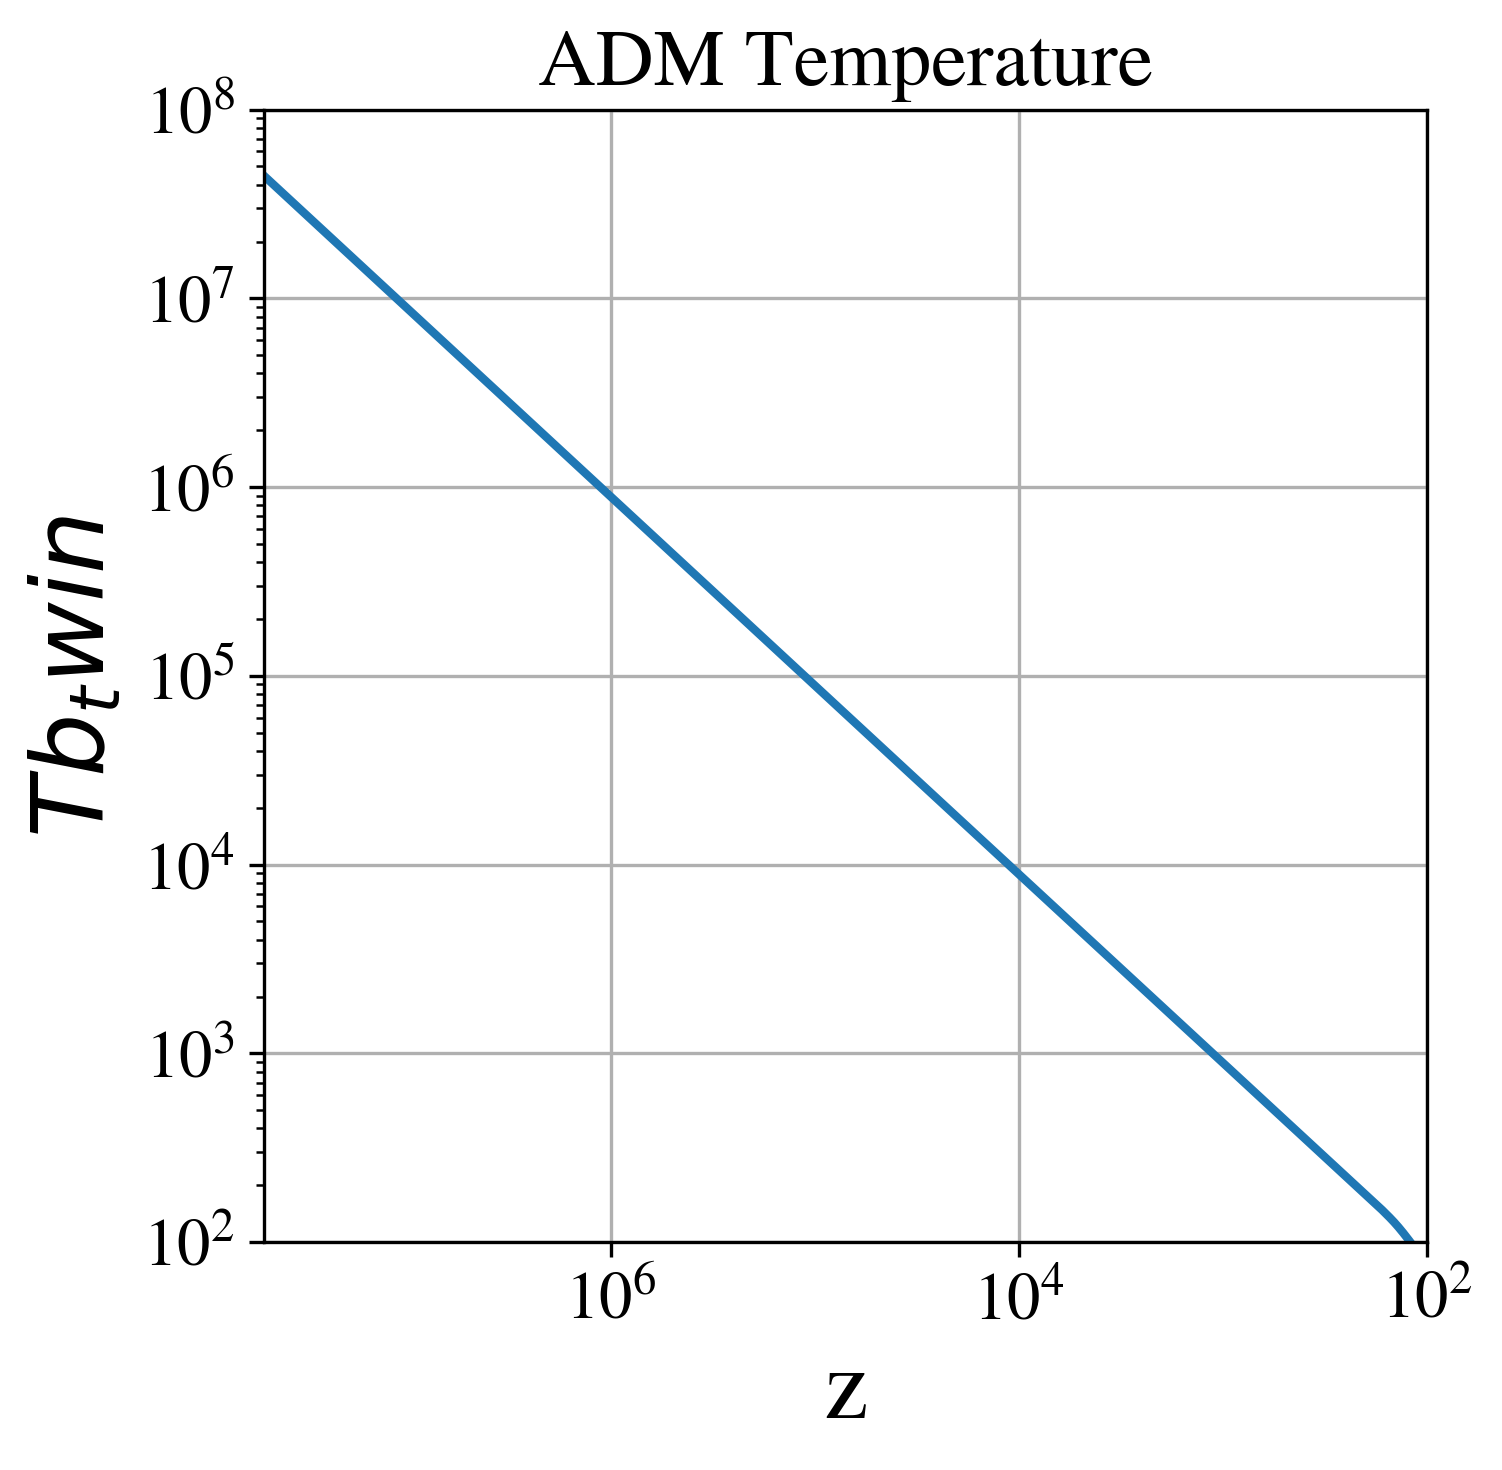

In [25]:
#Changed condition for steady state matter temp evolution to end at x_e_twin =0.1

plt.figure(figsize=(5,5),dpi=300)
plt.semilogx(thermo1['z'],thermo1['Tb_twin'],lw=2)#'0.1, 0.1, 1, 1, 0.01')
#plt.semilogx(thermo2['z'],thermo2['Tb_twin'],lw=2)#'0.1, 0.1, 1, 1, 0.01')
#plt.semilogx(thermo3['z'],thermo3['Tb_twin'],lw=2)#'0.1, 0.1, 1, 1, 0.01')

#plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()
#plt.plot([850.375,850.375],[0,10**5])
#plt.plot([21167.7,21167.7],[0,22377.6])
#plt.xlim(1*10**2,1*10**3)
plt.xlim(10**2,5*10**7)
#plt.plot(thermo['z'],1.05824*(1+thermo['z']))
#plt.scatter([26064],[27550])

#plt.xlim(3.4*10**2,3.6*10**2)

plt.ylim(100,10**8)
#plt.ylim(0.989,1)
plt.semilogy()
plt.gca().invert_xaxis()
#plt.legend()
#plt.text(10**5.9,10**-3.3,'$\hat{r}$ = %g,$\\Delta N_{eff}$ = %g,\n$m_{p}$\' = %g GeV, $m_{e}$\' = %g MeV, $\\alpha$\' = %g'%(r,deltaN,mp,me*1000,alpha),fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.xlabel('z',fontsize=24)
plt.ylabel('$Tb_twin$',fontsize=24)
plt.title('ADM Temperature')

#Redshift is 21307.5
#Twin ionization fraction is 0.000412195
#Matter temperature is 22503.6
#Twin matter photon temp difference is -45.9031

Text(0.5, 1.0, 'ADM relative Temperature difference')

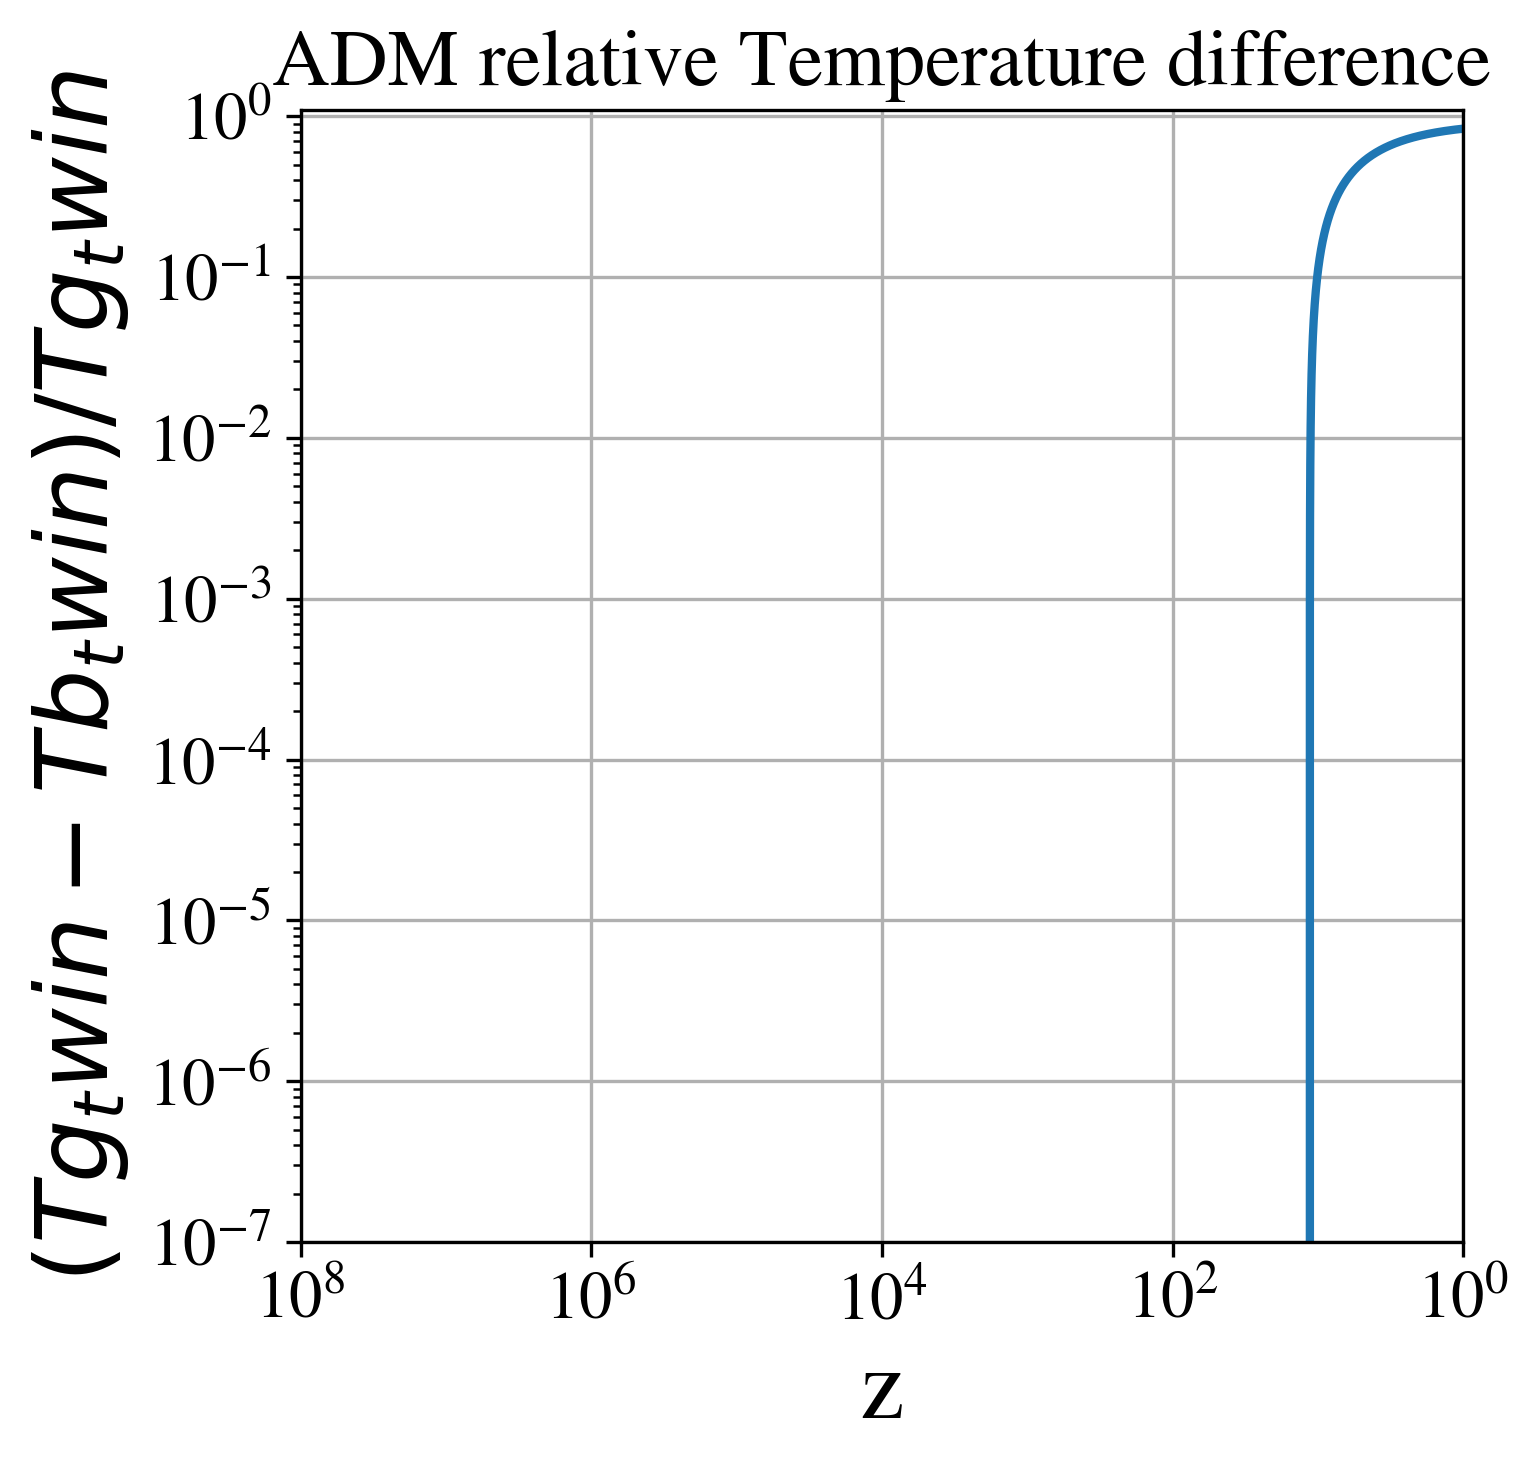

In [27]:
#Changed condition for steady state matter temp evolution to end at x_e_twin =0.1

plt.figure(figsize=(5,5),dpi=300)
plt.semilogx(thermo1['z'],((tratio/2.725)*(1+thermo1['z'])-thermo1['Tb_twin'])/((tratio/2.725)*(1+thermo1['z'])),lw=2)#'0.1, 0.1, 1, 1, 0.01')
#plt.semilogx(thermo2['z'],(1.05824*(1+thermo2['z'])-thermo2['Tb_twin'])/(1.05824*(1+thermo2['z'])),lw=2)#'0.1, 0.1, 1, 1, 0.01')
#plt.semilogx(thermo3['z'],(1.05824*(1+thermo3['z'])-thermo3['Tb_twin'])/(1.05824*(1+thermo3['z'])),lw=2)#'0.1, 0.1, 1, 1, 0.01')
#plt.semilogx(thermo4['z'],(1.05824*(1+thermo4['z'])-thermo4['Tb_twin'])/(1.05824*(1+thermo4['z'])),lw=2)#'0.1, 0.1, 1, 1, 0.01')

#plt.gca().set_xticks(ticks=[10**5,5*10**4,10**4,5*10**3,10**3])
plt.grid()
#plt.plot([850.375,850.375],[0,10**5])
#plt.plot([21167.7,21167.7],[0,22377.6])
#plt.xlim(1*10**2,1*10**3)
plt.xlim(10**0,1*10**8)
#plt.plot(thermo['z'],1.05824*(1+thermo['z']))
#plt.scatter([26064],[27550])

#plt.xlim(3.4*10**2,3.6*10**2)
plt.ylim(.0000001,1.1)
#plt.ylim(100,10**7)
#plt.ylim(0.989,1)
plt.semilogy()
plt.gca().invert_xaxis()
#plt.legend()
#plt.text(10**5.9,10**-3.3,'$\hat{r}$ = %g,$\\Delta N_{eff}$ = %g,\n$m_{p}$\' = %g GeV, $m_{e}$\' = %g MeV, $\\alpha$\' = %g'%(r,deltaN,mp,me*1000,alpha),fontsize=10, bbox=dict(facecolor='white',alpha=0.5, edgecolor='gray', boxstyle='round,pad=0.5'))
plt.xlabel('z',fontsize=24)
plt.ylabel('$(Tg_twin - Tb_twin)/Tg_twin$',fontsize=24)
plt.title('ADM relative Temperature difference')

#Redshift is 21307.5
#Twin ionization fraction is 0.000412195
#Matter temperature is 22503.6
#Twin matter photon temp difference is -45.9031